In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)

In [4]:
x = np.arange(10)
y = np.sin(x)
z = np.cos(x)

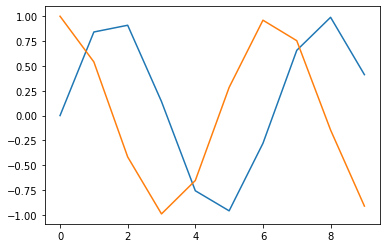

In [12]:
plt.plot(x, y)
plt.plot(x, z)

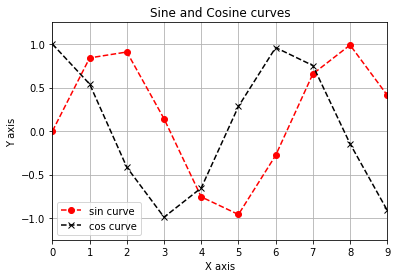

In [25]:
plt.plot(x, y, marker="o", color="r", linestyle="--", label="sin curve")
plt.plot(x, z, marker="x", color="k", linestyle="--", label="cos curve")
plt.xlabel("X axis");
plt.ylabel("Y axis")
plt.legend()
plt.xlim(0,9)
plt.ylim(-1.25, 1.25)

plt.title("Sine and Cosine curves")

plt.grid()


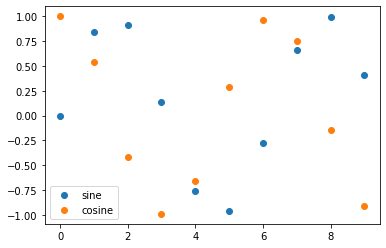

In [43]:
plt.scatter(x, y, label="sine")
plt.scatter(x, z, label="cosine")
plt.legend()

### Matplotlib functions may also be accessed through a lower level interface: axes

The "plt" interface does not allow us as much control over the plot elements. For greater control in more complicated plots, we need the axes interface

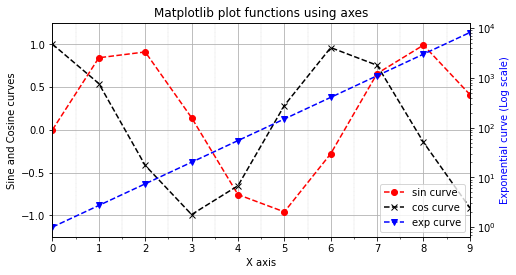

In [7]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()

line1, = ax.plot(x, y, marker="o", color="r", linestyle="--", label="sin curve")
line2, = ax.plot(x, z, marker="x", color="k", linestyle="--", label="cos curve")
#ax.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")
axr = plt.twinx()
line3, = axr.plot(x, np.exp(x), marker="v", color="b", linestyle="--", label="exp curve")

ax.set_xlabel("X axis");
ax.set_ylabel("Sine and Cosine curves")
ax.set_xlim(0,9)
ax.set_ylim(-1.25, 1.25)
ax.set_xticks(np.arange(0.5, 9), minor=True)

axr.set_ylabel("Exponential curve (Log scale)", color="b")
axr.set_yscale("log")
ax.set_title("Matplotlib plot functions using axes")

ax.grid()
ax.grid(which="minor", linestyle="--", linewidth=0.25)
ax.legend([line1, line2, line3], ["sin curve", "cos curve", "exp curve"], loc="lower right")

plt.savefig("./sin_cos_exp.jpg", dpi=150, bbox_inches="tight")

An exponential function on a log scale is linear, note the right hand side Y axis having a log scale!

In [119]:
# alternatively, use get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

In [116]:
labels

['sin curve', 'cos curve']

In [31]:
np.std(y)

0.657509486813685

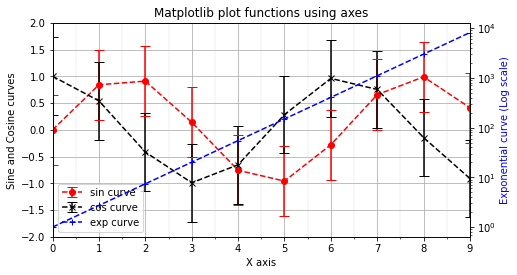

In [38]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()

#line1, = ax.plot(x, y, color="r", linestyle="--", label="sin curve")
line1 = ax.errorbar(x, y, yerr=np.std(y), marker="o", color="r", linestyle="--", label="sin curve", capsize=5)
line2 = ax.errorbar(x, z, yerr=np.std(z), marker="x", color="k", linestyle="--", label="cos curve", capsize=5)
#ax.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")
axr = plt.twinx()
line3, = axr.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")

ax.set_xlabel("X axis");
ax.set_ylabel("Sine and Cosine curves")
ax.set_xlim(0,9)
ax.set_ylim(-2, 2)
ax.set_xticks(np.arange(0.5, 9), minor=True)

axr.set_ylabel("Exponential curve (Log scale)", color="b")
axr.set_yscale("log")
ax.set_title("Matplotlib plot functions using axes")

ax.grid()
ax.grid(which="minor", linestyle="--", linewidth=0.25)
ax.legend([line1, line2, line3], ["sin curve", "cos curve", "exp curve"])

(-2.0, 2.0)

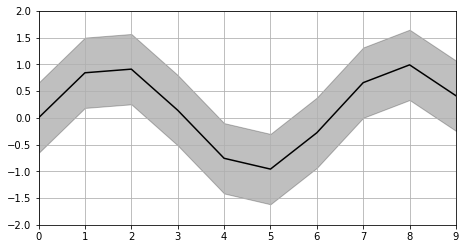

In [47]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()
ax.fill_between(x, y-np.std(y), y+np.std(y), alpha=0.25, color="k")
ax.plot(x, y, color="k")
ax.grid()
ax.set_xlim(0,9)
ax.set_ylim(-2, 2)

## Bar plots

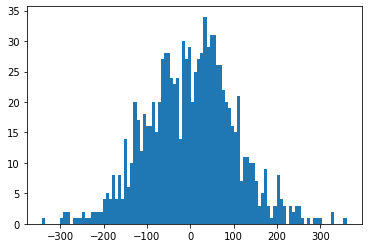

In [128]:
plt.hist(np.random.randn(1000)*100, bins=100);

<BarContainer object of 10 artists>

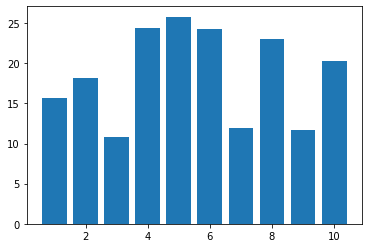

In [32]:
plt.bar(np.arange(1,11), np.random.randn(10)*5+20 )

## Box plots

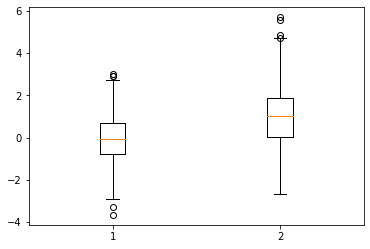

In [28]:
x = np.array([np.random.randn(1000), np.random.randn(1000)*1.5+1]).T
plt.boxplot(x);

The box encloses the Q1 (1st quantile, or the 25th percentile value) to Q3 (3rd quantile, or the 75th percentile value) range. 

In [13]:
np.quantile(x, 0.25), np.quantile(x, 0.75)

(-0.6475903054623516, 0.6479438754729301)

The whiskers are drawn at Q1 - 1.5\*IQR and Q3 + 1.5\*IQR, where IQR is the interquantile range. The circles are the outlier values beyond the whiskers. You can customize all these elements of the plot.

In [15]:
Q1 = np.quantile(x, 0.25)
Q3 = np.quantile(x, 0.75)
IQR = Q3 - Q1
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

-2.5908915768652743 2.5912451468758526


## Representing 2 dimensional data using pcolormesh, contour, contourf

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
xc = x[:-1] + np.diff(x)[0] * 0.5 # center points of X axis
y = np.linspace(-2*np.pi, 2*np.pi, 100)
yc = y[:-1] + np.diff(y)[0] * 0.5 # center points of Y axis

XX, YY = np.meshgrid(xc,yc)

In [94]:
x, xc

(array([-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531]),
 array([-5.58505361, -4.1887902 , -2.7925268 , -1.3962634 ,  0.        ,
         1.3962634 ,  2.7925268 ,  4.1887902 ,  5.58505361]))

In [76]:
XX.shape

(100, 100)

In [6]:
Z = np.sin(XX) + np.sin(YY)

In [7]:
Z.shape

(99, 99)

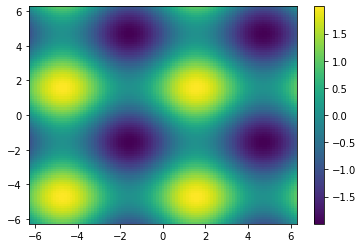

In [15]:
PC = plt.pcolormesh(x, y, Z)
plt.colorbar(PC)

<a list of 42 text.Text objects>

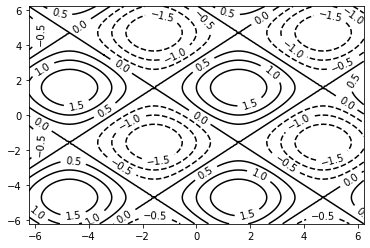

In [12]:
CR = plt.contour(xc, yc, Z, colors="k")
plt.clabel(CR)

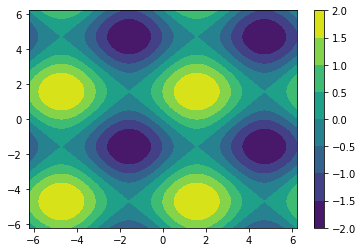

In [13]:
CF = plt.contourf(xc, yc, Z)
plt.colorbar(CF)

In [16]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

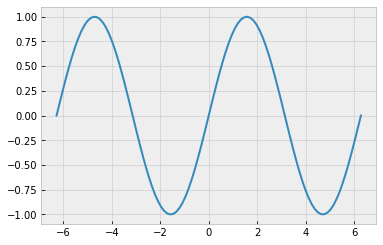

In [17]:
with plt.style.context("bmh"):
    plt.plot(x, np.sin(x))

Try changing the style context and have a look at available styles at the matplotlib gallery: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html